# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

import numpy as np
import pandas as pd

# Load and convert data

In [17]:
n_samples = 1500
!wget http://deron.meranda.us/data/census-derived-all-first.txt
data = pd.read_csv("census-derived-all-first.txt", delimiter="\s+", header=None)
data = np.array(data[0].values.ravel(), dtype=np.str)
data = data[:n_samples]

--2015-10-17 08:54:58--  http://deron.meranda.us/data/census-derived-all-first.txt
Resolving deron.meranda.us (deron.meranda.us)... 66.117.209.18
Connecting to deron.meranda.us (deron.meranda.us)|66.117.209.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184869 (181K) [text/plain]
Saving to: ‘census-derived-all-first.txt.1’

100%[======================================>] 184 869     77,8KB/s   in 2,3s   

2015-10-17 08:55:00 (77,8 KB/s) - ‘census-derived-all-first.txt.1’ saved [184869/184869]



In [18]:
from sklearn.feature_extraction.text import HashingVectorizer
X = HashingVectorizer(ngram_range=(2, 6), 
                      n_features=2**12, 
                      analyzer="char", 
                      non_negative=True, 
                      binary=True,
                      norm="l1").transform(data).toarray()

# Clustering

In [19]:
from beard.clustering import ScipyHierarchicalClustering
clustering = ScipyHierarchicalClustering(method="average", 
                                         affinity="cityblock",
                                         best_threshold_precedence=False).fit(X)

/home/gilles/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


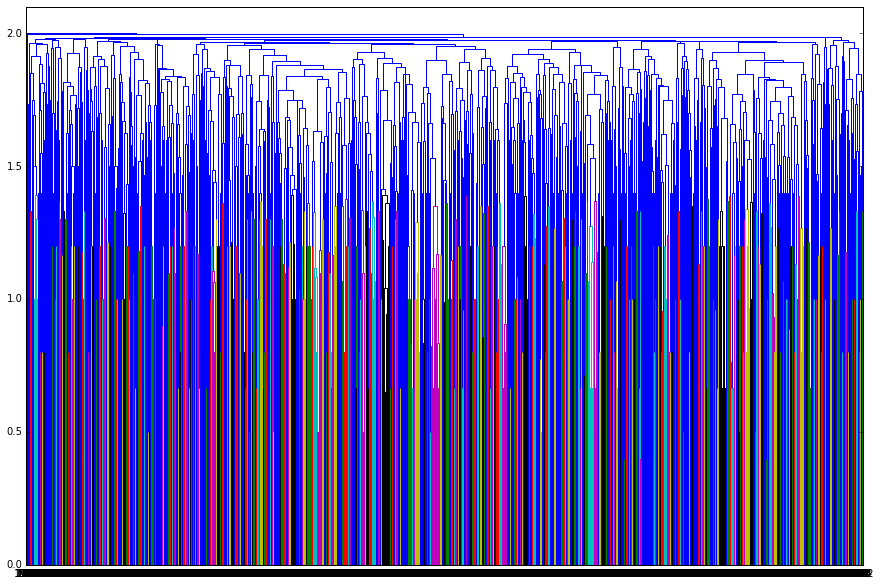

In [20]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15, 10))
Z = dendrogram(clustering.linkage_)
plt.show()

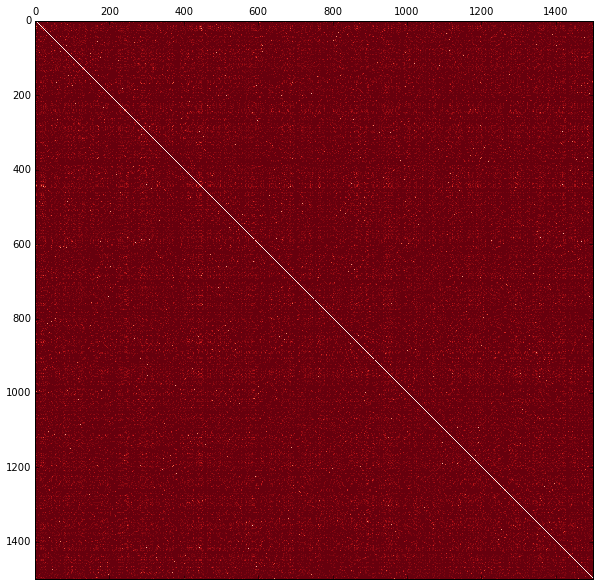

In [21]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster.bicluster import SpectralCoclustering

# Normal
X_aff = pairwise_distances(X, metric="cityblock")
plt.matshow(X_aff, cmap=plt.cm.Reds)

# # Biclustered
# model = SpectralCoclustering(n_clusters=8)
# model.fit(X_aff)

# X_aff = X_aff[np.argsort(model.row_labels_)]
# X_aff = X_aff[:, np.argsort(model.column_labels_)]

# plt.matshow(X_aff, cmap=plt.cm.Reds)

# Cut and visualize the projection

In [22]:
from sklearn.manifold import TSNE

model = TSNE(metric="cityblock")
coords = model.fit_transform(X)

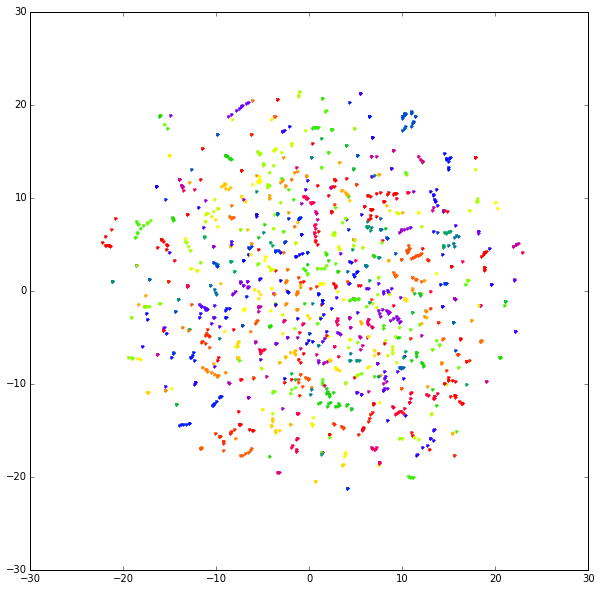

0 ['GUY' 'GUS']
1 ['EDMUND']
2 ['YOUNG']
3 ['TED' 'ED' 'NED']
4 ['EDNA']
5 ['EDGAR']
6 ['JARED']
7 ['FRED' 'ALFRED' 'ALFREDO' 'FREDDIE' 'FREDA' 'WINIFRED' 'WILFRED' 'FREDDY'
 'WILFREDO']
8 ['MILDRED']
9 ['REBECCA' 'REBEKAH']
10 ['GREGORY' 'GREG' 'GREGG' 'GRETA' 'GREGORIO']
11 ['GRETCHEN']
12 ['BRETT' 'BRET']
13 ['AUBREY']
14 ['REX']


In [24]:
from ipywidgets import interact
from ipywidgets import FloatSlider

@interact(threshold=FloatSlider(min=0.0, max=clustering.linkage_[-1, 2], value=1.5, step=0.01))
def plot_clusters(threshold=1.5):
    clustering.set_params(n_clusters=None)
    clustering.set_params(threshold=threshold)
    labels = clustering.labels_
    n_labels = len(np.unique(labels))

    cm = plt.get_cmap("prism")
    colors =  (cm(1. * i / n_labels) for i in range(n_labels))
    plt.figure()

    for k, c in zip(np.unique(labels), colors):
        plt.plot(coords[labels == k, 0], coords[labels == k, 1], '.', label=k, color=c)

    plt.show()
    
    for i in range(min(n_labels, 15)):
        print(i, data[labels == i])